# Wine Quality DataSet

In [28]:
import os
print(os.getcwd())

/home/mabouzain/MADS-MachineLearning-course/my-work


In [29]:
from pathlib import Path
import pandas as pd
import urllib.request

def load_white_wine():
    # Step 1: Define where the file will be stored
    csv_path = Path("datasets/winequality-white.csv")

    # Step 2: Download if missing
    if not csv_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
        urllib.request.urlretrieve(url, csv_path)

    # Step 3: Load and return as DataFrame
    return pd.read_csv(csv_path, sep=';')

In [30]:
white_wine = load_white_wine()

In [31]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [33]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [34]:
white_wine['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

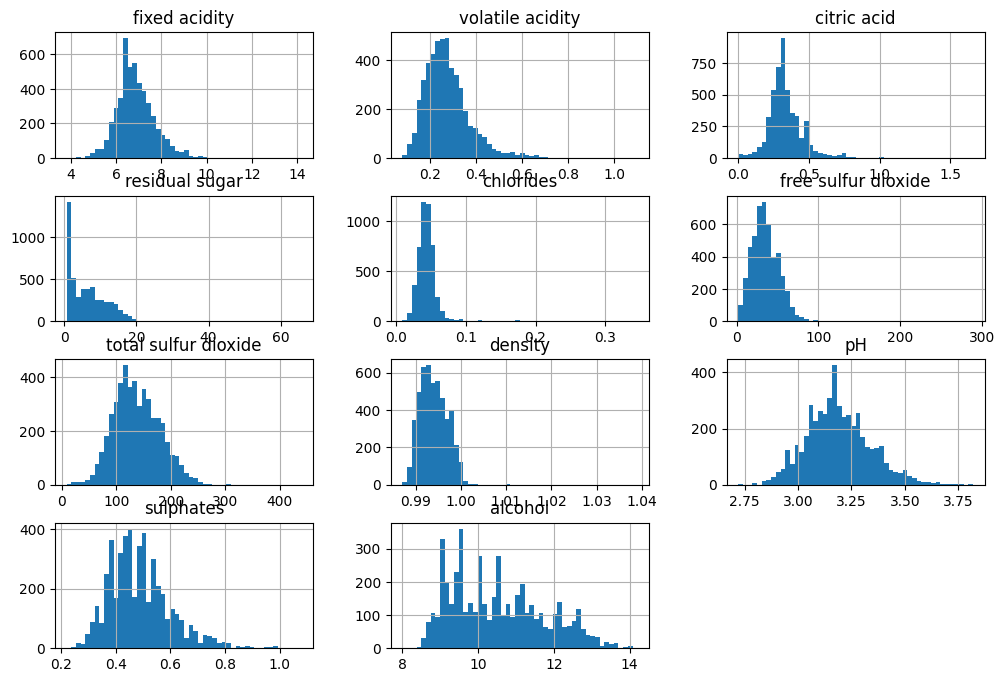

In [35]:
import matplotlib.pyplot as plt
# Select all columns except 'quality'
features = white_wine.drop(columns='quality')

# Plot histograms for features only
features.hist(bins=50, figsize=(12, 8))
plt.show()

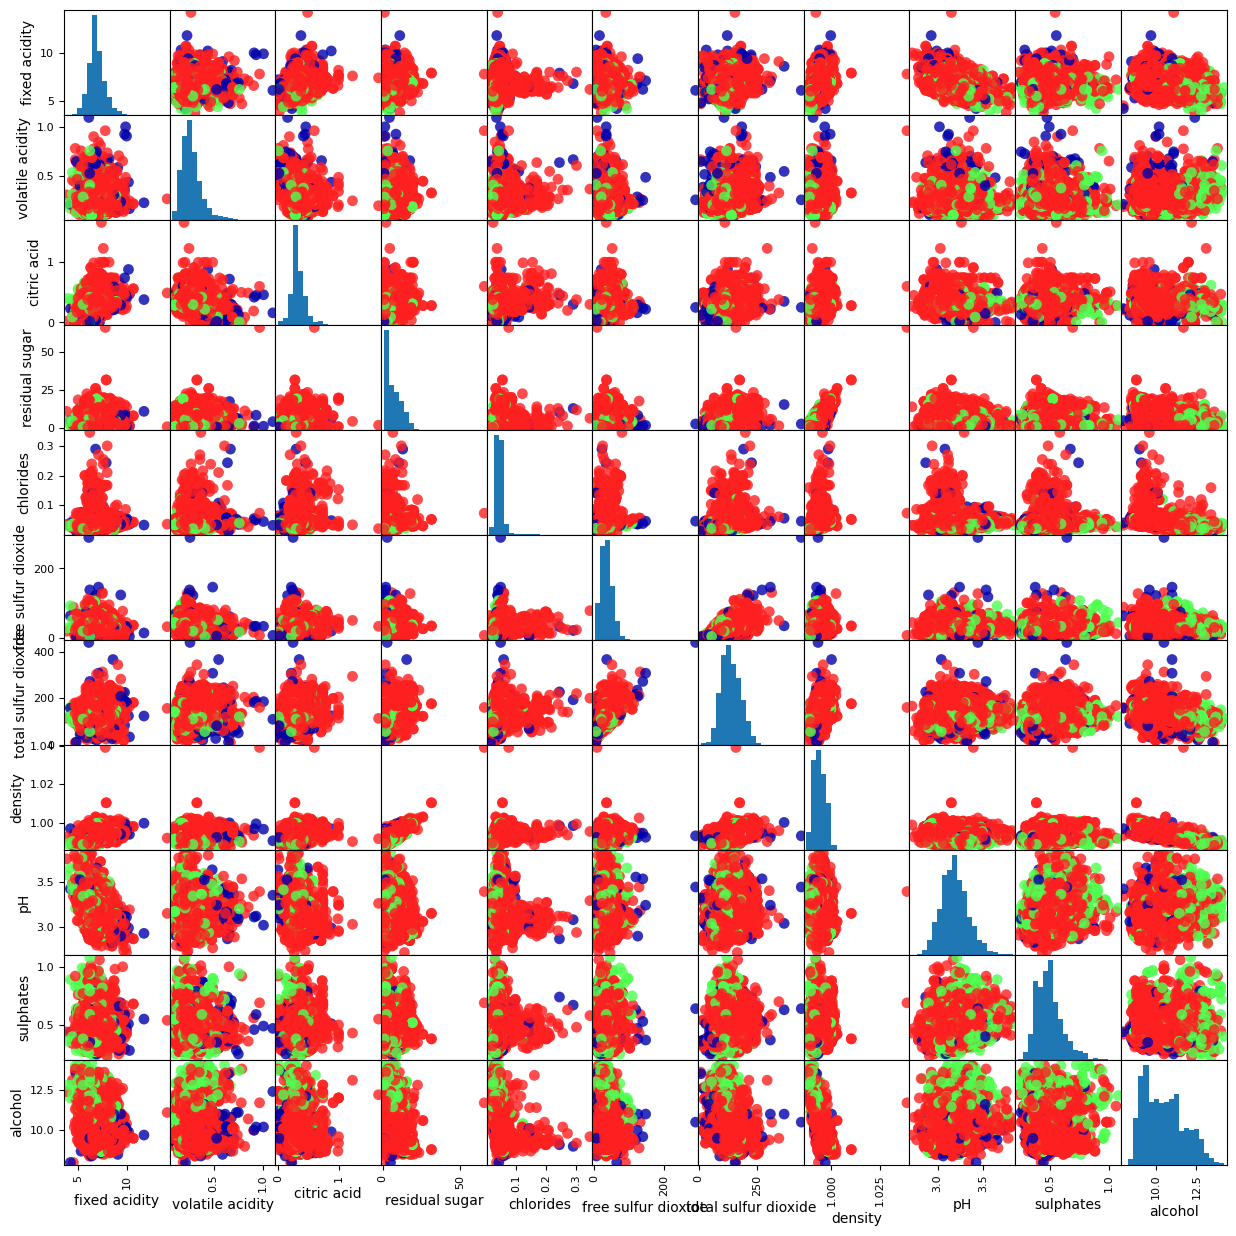

In [36]:
from pandas.plotting import scatter_matrix 
import mglearn
scatter_matrix(white_wine.iloc[:, :-1], c=white_wine['quality'], figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [37]:
white_wine= white_wine[white_wine['quality'].isin([5,6])]
white_wine['quality'].value_counts().sort_index()

quality
5    1457
6    2198
Name: count, dtype: int64

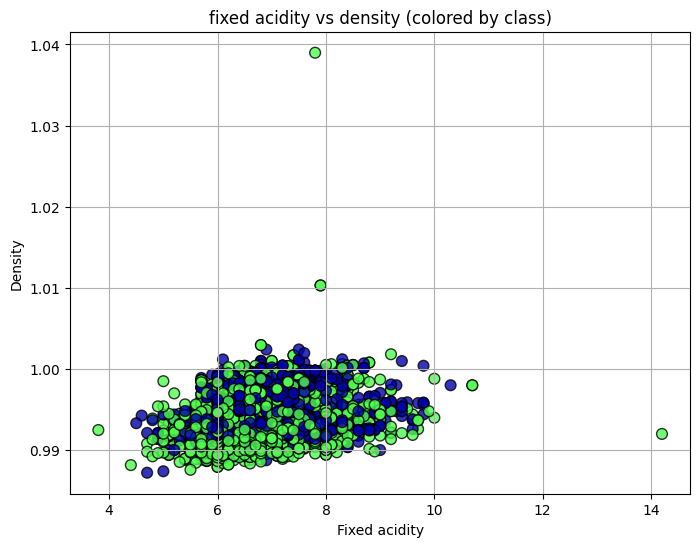

In [39]:
import matplotlib.pyplot as plt

# Choose your two features
x_feature = 'fixed acidity'
y_feature = 'density'

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    white_wine[x_feature],
    white_wine[y_feature],
    c=white_wine['quality'],     # color by class
    cmap=mglearn.cm3,               # or 'bwr', 'coolwarm', etc.
    s=60,
    alpha=0.8,
    edgecolor='k'
)

plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f'{x_feature} vs {y_feature} (colored by class)')
plt.grid(True)
plt.show()

In [40]:
corr_matrix = white_wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.339987
pH                      0.065685
sulphates               0.040497
citric acid             0.001423
free sulfur dioxide    -0.022859
fixed acidity          -0.056204
residual sugar         -0.083344
chlorides              -0.133260
total sulfur dioxide   -0.157961
volatile acidity       -0.213074
density                -0.218774
Name: quality, dtype: float64

<Figure size 1000x800 with 0 Axes>

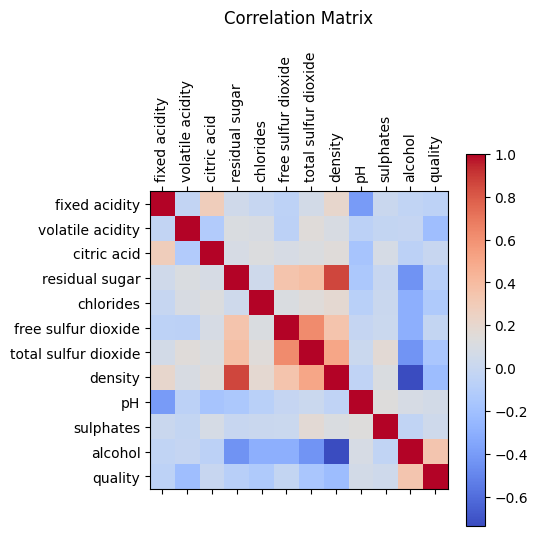

In [41]:
# Step 1: plot using matshow
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm')  # 'coolwarm' = red/blue color scale
plt.colorbar()  # adds the scale on the side

# Step 2: add feature names as tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Optional: title
plt.title("Correlation Matrix", pad=20)
plt.show()